In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns



for dirname, _, filenames in os.walk('titanic/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

train_data = pd.read_csv("train.csv")
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women*100)

% of women who survived: 74.20382165605095


In [22]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men= sum(men)/len(men)
print("% of men who survived:", rate_men*100)


% of men who survived: 18.890814558058924


In [33]:
#code from kaggle
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


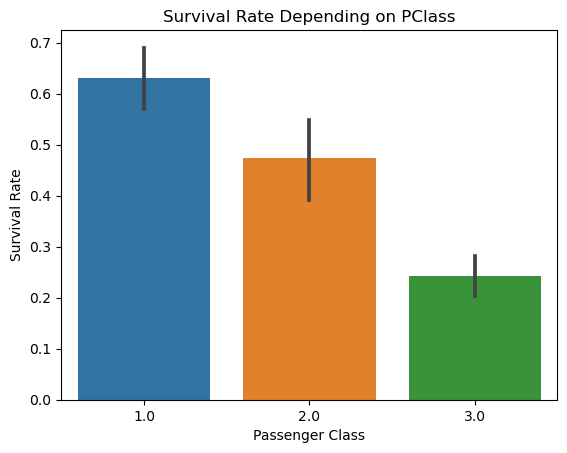

<Axes: xlabel='Survived', ylabel='count'>

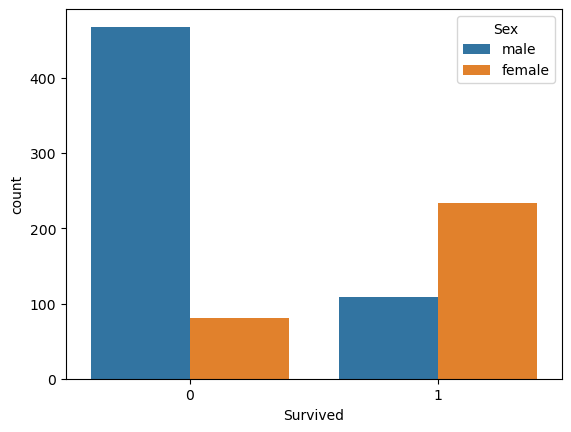

In [10]:
#Visualization of the data in two graphs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

survived = pd.read_csv('submission.csv')
pclass = pd.read_csv('train.csv')
combined = pd.concat([survived, pclass], axis =0)

#correlation between survival and pclass + visual graph
correlation = combined['Survived'].corr(combined['Pclass'])
sns.barplot(x='Pclass', y='Survived', data=combined)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate Depending on PClass')
plt.show()

#survival male and female
sns.countplot(x='Survived', data=train_data,hue='Sex')




In [50]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split


data = load_dataset("titanic")
data
bins = [0,5,18,21,50,80]
label = ['Infant', 'Kid', 'Teens', 'Adult','Senior']
data['age']=pd.cut(data['age'],bins=bins,labels=label)
pd.DataFrame(data['age'].value_counts())



,count
age,
Adult,446
Kid,95
Teens,65
Senior,64
Infant,44


In [124]:
#logistic regression model
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline

train = pd.read_csv('train.csv')
train.drop('Cabin', axis=1, inplace=True)

#convert categorical data to numerical
sex = pd.get_dummies(train['Sex'], drop_first=True)
embarked = pd.get_dummies(train['Embarked'], drop_first=True)
train=pd.concat([train,sex,embarked], axis =1)

#clear data
train.drop(['Sex','Embarked','Name','Ticket','Age','Fare'], axis =1, inplace=True)
x=train.drop('Survived', axis =1)
y=train['Survived']
train.head()

#build model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=101)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train,y_train)
pred = logreg.predict(x_test)


#return accuracy
accuracy = accuracy_score(y_test,pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7798507462686567


In [159]:
#Model 2: KNearestNeighbor

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.drop(['Name','Sex','Cabin','Ticket','Embarked'], axis =1, inplace=True)
#correlation between survived and other numerical columns
corr_data = train.corr()
corr_data["Survived"].sort_values(ascending=False)
#train['Embarked']=train['Embarked'].fillna("S")
#drop not needed features for test and train data sets
q = ['PassengerId','SibSp','Parch','Age']
train2 = train.drop(q, axis =1)
train2.head()

t = ['SibSp','Parch','Age','Name','Cabin','Ticket']
test = test.drop(t, axis =1)
test.head()

#mean of the fare to fill in missing values
mean = test["Fare"].mean()
test["Fare"]=test["Fare"].fillna(mean)
#median of age to fill missing values
medianage = train['Age'].median()
train['Age'].fillna(medianage,inplace=True)

#change non-numerical into numeric data
test['Sex'] = labelencoder.fit_transform(test['Sex'].values)
test['Embarked'] = labelencoder.fit_transform(test['Embarked'].values)

#train data split
x =train.drop('Survived', axis =1)
y = train['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state=4)

columns_with_missing_values = train.isna().any()
print(columns_with_missing_values)



krange = range(1,26)

score =[]
for k in krange:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    ypred = knn.predict(x_test)
    score.append(metrics.accuracy_score(y_test,ypred))
print(score)

knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(x_train,y_train)
ypred = knn.predict(x_test)
print(metrics.accuracy_score(y_test,ypred))







PassengerId    False
Survived       False
Pclass         False
Age            False
SibSp          False
Parch          False
Fare           False
dtype: bool
[0.6302521008403361, 0.6666666666666666, 0.6330532212885154, 0.6694677871148459, 0.6442577030812325, 0.6694677871148459, 0.6526610644257703, 0.6582633053221288, 0.6526610644257703, 0.6862745098039216, 0.6778711484593838, 0.6974789915966386, 0.6862745098039216, 0.6946778711484594, 0.6890756302521008, 0.7002801120448179, 0.7002801120448179, 0.7198879551820728, 0.7142857142857143, 0.7254901960784313, 0.7086834733893558, 0.711484593837535, 0.7030812324929971, 0.7170868347338936, 0.7142857142857143]
0.6890756302521008
